In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.models import Model

import matplotlib.pyplot as plt

/home/ritu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ritu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ritu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ritu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(Conv2D(26, kernel_size=(3,3), input_shape=input_shape))
model.add(Conv2D(24, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(200, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(10,activation=tf.nn.softmax))

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 133s 2ms/step - loss: 0.2085 - accuracy: 0.9367
Epoch 2/10
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0982 - accuracy: 0.9696
Epoch 3/10
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0794 - accuracy: 0.9754
Epoch 4/10
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0661 - accuracy: 0.9787
Epoch 5/10
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0577 - accuracy: 0.9810
Epoch 6/10
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0514 - accuracy: 0.9833
Epoch 7/10
60000/60000 [==============================] - 133s 2ms/step - loss: 0.0476 - accuracy: 0.9849
Epoch 8/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0444 - accuracy: 0.9858
Epoch 9/10
60000/60000 [==============================] - 133s 2ms/step - loss: 0.0405 - accuracy: 0.9864
Epoch 10/10
60000/60000 [====================

In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 5s 477us/step


[0.05459105057964116, 0.9858999848365784]

9


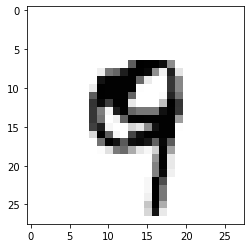

In [8]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [9]:
'''
Activation Maps
'''

'\nActivation Maps\n'

In [10]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_test[image_index].reshape(1, 28, 28, 1)) 

(1, 26, 26, 28)


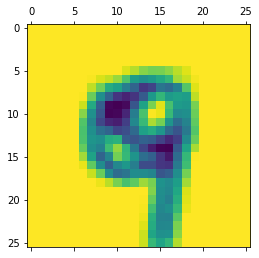

In [11]:
first_layer_activation = activations[0] #Activation map for any layer can be seen from here
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

(1, 24, 24, 26)


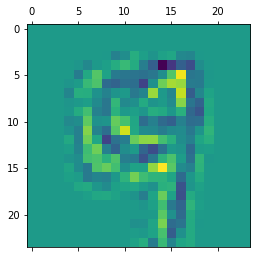

In [12]:
first_layer_activation = activations[1] #Activation map for any layer can be seen from here
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

(1, 11, 11, 24)


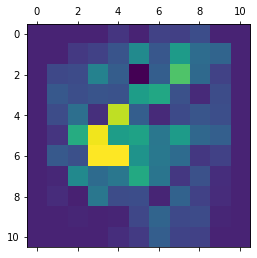

In [14]:
first_layer_activation = activations[3] #Activation map for any layer can be seen from here
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

(1, 22, 22, 24)


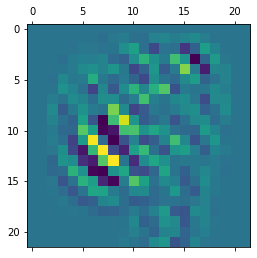

In [13]:
first_layer_activation = activations[2] #Activation map for any layer can be seen from here
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

(1, 2904)


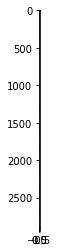

In [16]:
first_layer_activation = activations[4] #Activation map for any layer can be seen from here
print(first_layer_activation.shape)
# plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

plt.imshow(first_layer_activation.T)

(1, 200)


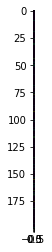

In [17]:
first_layer_activation = activations[5] #Activation map for any layer can be seen from here
print(first_layer_activation.shape)
plt.imshow(first_layer_activation.T)

(1, 200)


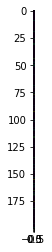

In [18]:
first_layer_activation = activations[6] #Activation map for any layer can be seen from here
print(first_layer_activation.shape)
plt.imshow(first_layer_activation.T)

(1, 10)


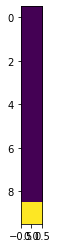

In [22]:
first_layer_activation = activations[7] #Activation map for any layer can be seen from here
print(first_layer_activation.shape)
plt.imshow(first_layer_activation.T)